In [1]:
!pip install lida 
!pip install lida[infographics] # for infographics support

ERROR: Invalid requirement: '#'


In [6]:
from lida import Manager, TextGenerationConfig , llm  

In [46]:
from openai import OpenAI
client = OpenAI()

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
    {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="In the realm of code, a mystery unfolds,\nWhere lines of logic, their tales untold.\nA concept profound, mystical and rare,\nLet me take you on a journey, if you dare.\n\nBehold the beauty of recursion's embrace,\nA wondrous loop, a dance of grace.\nIn a function's realm, a call repeats,\nUnraveling problems by code's discreet beats.\n\nLike a hall of mirrors, reflections entwined,\nRecursion echoes, repeating in kind.\nA function, it calls itself, oh what a sight,\nMultiplying itself in the midst of the night.\n\nWith boundless precision, it dives deep within,\nSeeking the answers, a quest to begin.\nThrough layers of code, it gracefully weaves,\nOvercoming hurdles, as it achieves.\n\nA tree of knowledge, it gently grows,\nEach branch connected, a tale it bestows.\nBranches sprouting forth, infinitely grand,\nA fractal of thoughts, expanding, unplanned.\n\nYet, caution prevails, as we find our stride,\nA loop unchecked, chaos awaits to reside.\nBoundarie

In [47]:
# goals can also be based on a persona
lida = Manager()
textgen_config = TextGenerationConfig(
    max_tokens=50,
    temperature=0.7,
    top_p=1.0,
    frequency_penalty=0.0,
    presence_penalty=0.0
)
summary = lida.summarize("./data/Aging report.csv", textgen_config=textgen_config)
persona = "a desk officer at fertilizers company who aims to minimize age of stock(i.e. selling generated product quickely, and not keeping it for too long) wants your help to navigate through given data such that he can make better decisions for his aim."
personal_goals = lida.goals(summary, n=5, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of quantity of products?

**Visualization:** `Histogram of Quantity`

**Rationale:** This histogram will provide an overview of the distribution of product quantities in the dataset. By visualizing the frequency of different quantity values, the desk officer can identify any outliers or patterns in the data that may impact the age of stock.



### Goal 1
---
**Question:** Which product categories have the highest total value?

**Visualization:** `Bar chart of Total_Value by Category`

**Rationale:** By plotting the total value of products by category in a bar chart, the desk officer can easily compare the performance of different categories. This visualization will help identify the categories that contribute the most to the overall value of stock, allowing the officer to focus on those categories to minimize the age of stock.



### Goal 2
---
**Question:** What is the average age of stock for each supplier?

**Visualization:** `Bar chart of Days_in_Stock by Supplier`

**Rationale:** By visualizing the average age of stock for each supplier in a bar chart, the desk officer can compare the performance of different suppliers in terms of stock turnover. This will help identify suppliers who consistently deliver products with shorter shelf life, allowing the officer to make informed decisions about supplier selection and minimize the age of stock.



### Goal 3
---
**Question:** How does the quantity of products vary over time?

**Visualization:** `Line chart of Quantity over Date_Added`

**Rationale:** By plotting the quantity of products over time in a line chart, the desk officer can observe any trends or patterns in product demand. This visualization will help identify periods of high and low demand, enabling the officer to adjust stock levels accordingly and minimize the age of stock.



### Goal 4
---
**Question:** What is the geographical distribution of stock locations?

**Visualization:** `Map plot of Location`

**Rationale:** By visualizing the geographical distribution of stock locations on a map, the desk officer can identify regions where stock is concentrated or sparse. This will help optimize the distribution of stock to minimize transportation costs and reduce the age of stock.


## Generate Visualizations

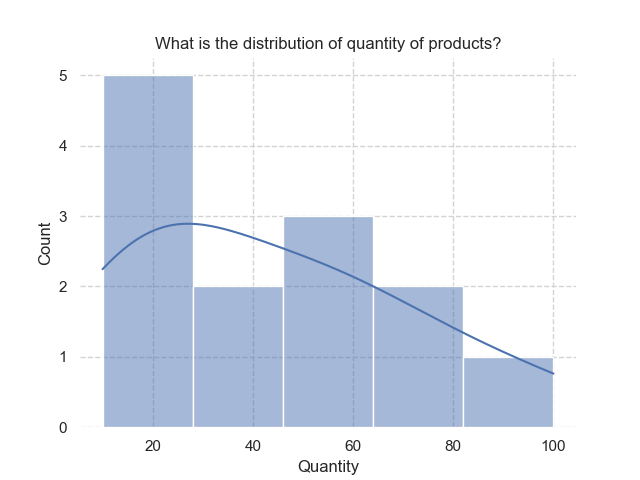

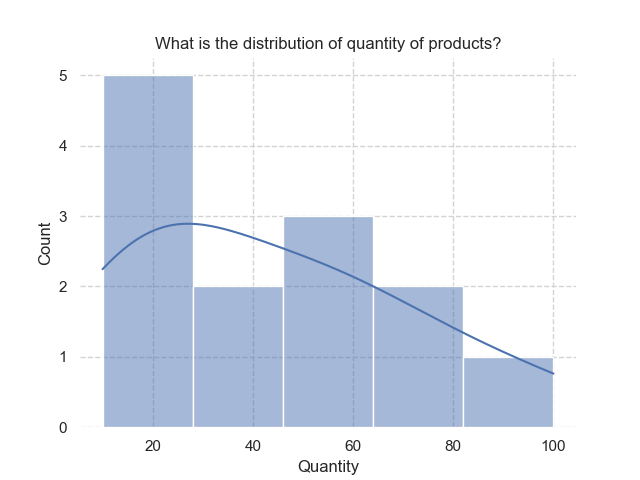

In [48]:
i = 0
library = "seaborn"
goals = personal_goals
textgen_config = TextGenerationConfig(n=2, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)  
for chart in charts:
    display(chart)

### Generate visualization via a "user query"   

<string>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



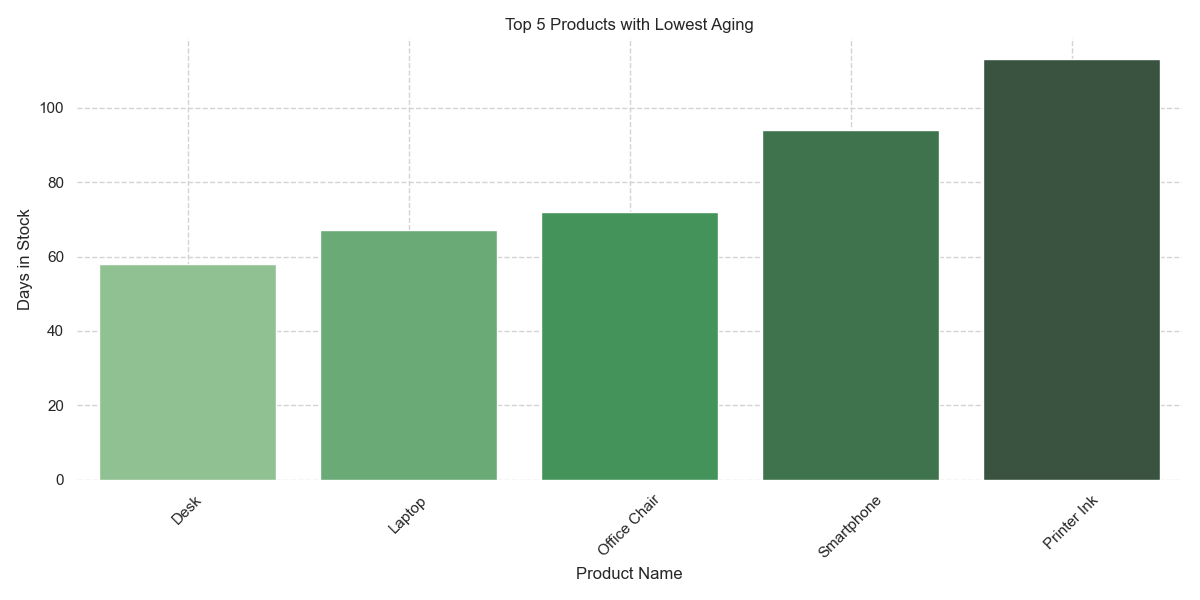

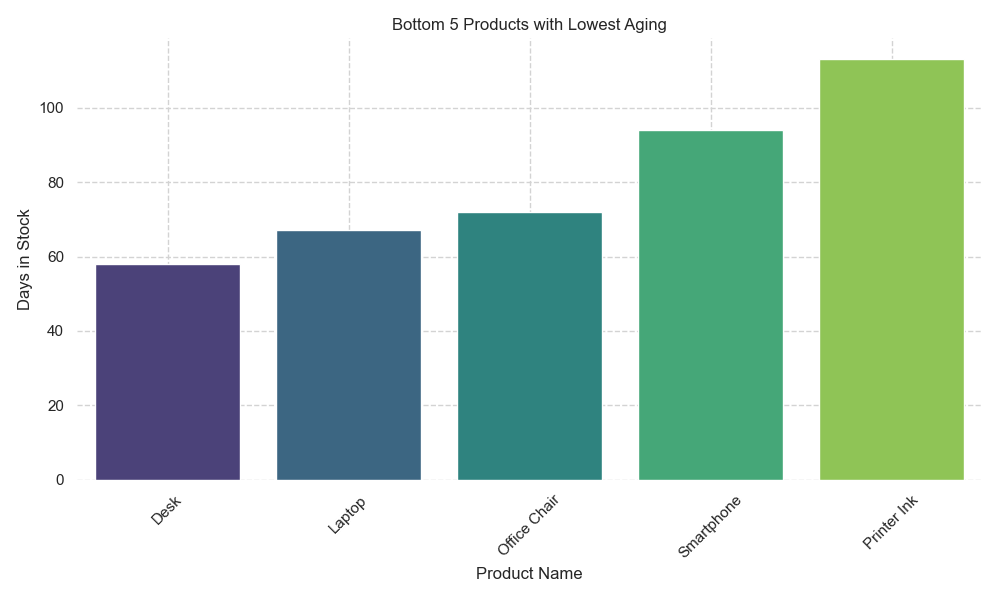

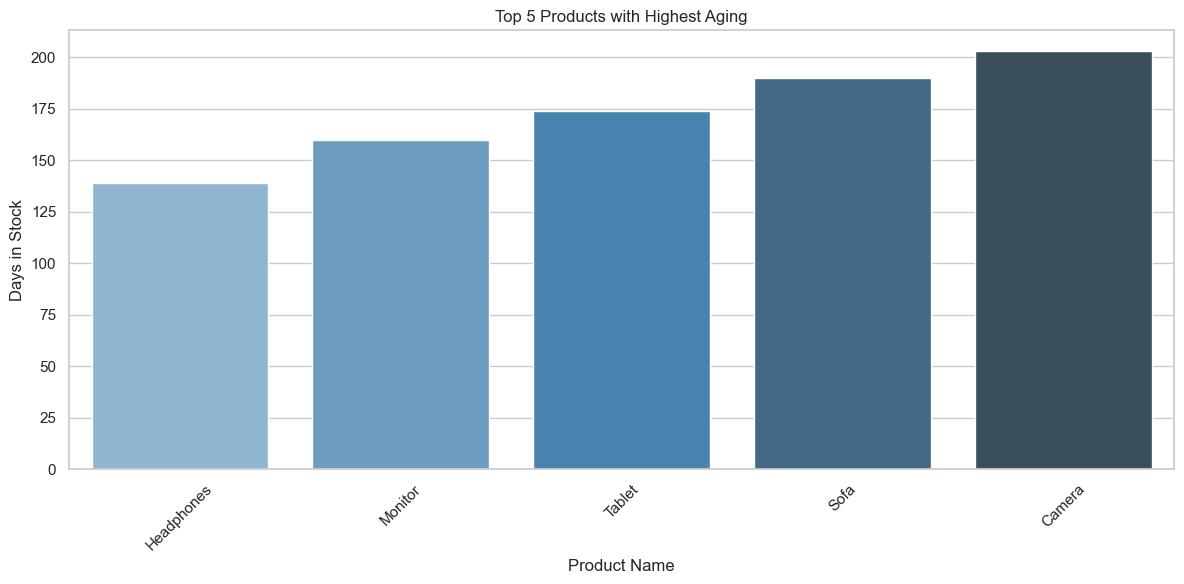

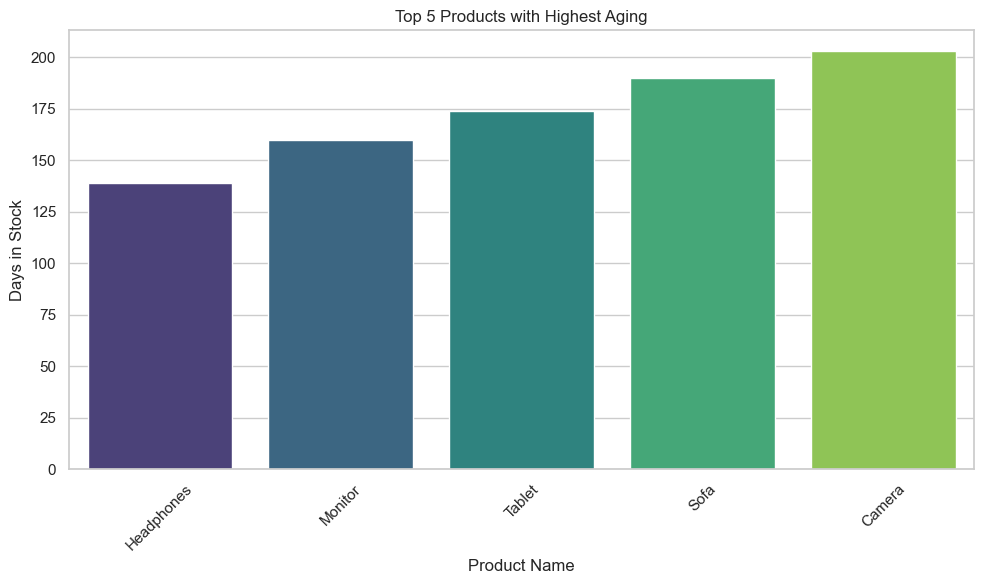

In [49]:
user_query = "plot graphs to see the products with heighest aging and lowest aging."
textgen_config = TextGenerationConfig(n=2, temperature=0.2)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)
# get commented code from the output of the above cell as shown below-->
for chart in charts:
    display(chart)

## Visualization explanations and accessibility